# Sprint 1 - Data Exploration and Basic EDA

This is the first notebook of the capstone project. It outlines detailed steps to familiarize LinkedIn Job Postings dataset from 2023. Here, we will go over the data quality issues through various data cleaning methods and highlight any notable observations regarding data processing. Then, the basic Exploratory Data Analysis (EDA) has been performed to showcase potential relationships between different variables and `views`, our target variable. 

Author: JJ Park

Date: 28/02/2024

## LinkedIn Job Postings 2023

### Question of Interest
How can we leverage the job postings data from LinkedIn to add significant value to both companies and job applicants? Here, we will tackle the `views` column by conducting preliminary EDA to find relationships between different variables within the dataset. 

- Company: what are the key features in a job posting that recruiters should emphasize to raise the number of views and attract more talents?
- Applicant: can we predict the latest job trends by analyzing job postings with high views?

### Dataset

Dataset has been sourced from: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/data. 

### Table of Contents

1. Data Dictionary
2. Data Loading
3. Data Cleaning - Datatypes
4. Data Cleaning - Duplicates
5. Data Cleaning - Null Values
6. Basic EDA - Visualizing Patterns
7. Summary

## Data Dictionary

The data dictionary outlines all the variables from the `job_postings.csv` dataset. The descriptions of each variable are directly sourced from the author's Github: https://github.com/ArshKA/LinkedIn-Job-Scraper/blob/master/DatabaseStructure.md.

1. `job_id`: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/{ job_id })
2. `company_id`: Identifier for the company associated with the job posting (maps to companies.csv)
3. `title`: Job title
4. `description`: Job description
5. `max_salary`: Maximum salary
6. `med_salary`: Median salary
7. `min_salary`: Minimum salary
8. `pay_period`: Pay period for salary (Hourly, Monthly, Yearly)
9. `formatted_work_type`: Type of work (Fulltime, Parttime, Contract)
10. `location`: Job location
11. `applies`: Number of applications that have been submitted
12. `original_listed_time`: Original time the job was listed
13. `remote_allowed`: Whether job permits remote work
14. `views`: Number of times the job posting has been viewed
15. `job_posting_url`: URL to the job posting on a platform
16. `application_url`: URL where applications can be submitted
17. `application_type`: Type of application process (offsite, complex/simple onsite)
18. `expiry`: Expiration date or time for the job listing
19. `closed_time`: Time to close job listing
20. `formatted_experience_level`: Job experience level (entry, associate, executive, etc)
21. `skills_desc`: Description detailing required skills for job
22. `listed_time`: Time when the job was listed
23. `posting_domain`: Domain of the website with application
24. `sponsored`: Whether the job listing is sponsored or promoted
25. `work_type`: Type of work associated with the job
26. `currency`: Currency in which the salary is provided
27. `compensation_type`: Type of compensation for the job
28. `scraped`: Has been scraped by `details_retriever`

## Data Loading

In this section, we will first load the LinkedIn dataset, then explore the dataset by checking the first and last few rows to improve our understanding.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
raw_df = pd.read_csv('../Data/job_postings.csv')

# Display all the columns, avoiding truncated column names
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

# Check the first few rows
raw_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,1.701680e+12,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,1.701680e+12,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,1.701680e+12,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [3]:
# Check the last few rows
raw_df.tail()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,1.692830e+12,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,1.695430e+12,NaN,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,1.699040e+12,NaN,4.0,https://www.linkedin.com/jobs/view/108965123/?...,NaN,ComplexOnsiteApply,1.701630e+12,NaN,NaN,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,NaN,1.699050e+12,NaN,NaN,https://www.linkedin.com/jobs/view/102339515/?...,NaN,SimpleOnsiteApply,1.701640e+12,NaN,NaN,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,1.692750e+12,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.708300e+12,NaN,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1
33245,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,"Chicago, IL",NaN,1.699050e+12,NaN,7.0,https://www.linkedin.com/jobs/view/3958427/?tr...,NaN,ComplexOnsiteApply,1.714600e+12,NaN,NaN,Must be a seasoned stylist with an existing bo...,1.699050e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,1699057868


In [4]:
# Check the sample (size of 50) rows
raw_df.sample(50)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
22598,3699080678,10420321.0,"Sourcing Manager, Procurement",The salary range for this position is $62.07 -...,66.21,NaN,62.07,HOURLY,Contract,United States,15.0,1.692830e+12,1.0,168.0,https://www.linkedin.com/jobs/view/3699080678/...,https://themomproject.com/projects/sourcing-ma...,OffsiteApply,1.695420e+12,NaN,Mid-Senior level,NaN,1.692830e+12,themomproject.com,0,CONTRACT,USD,BASE_SALARY,1
11411,3755591764,2997.0,Border Patrol Agent,Please see announcement on USAJOBS for availab...,107680.00,NaN,82830.00,YEARLY,Full-time,"San Diego, CA",2.0,1.699050e+12,NaN,62.0,https://www.linkedin.com/jobs/view/3755591764/...,NaN,ComplexOnsiteApply,1.701640e+12,NaN,Entry level,NaN,1.699050e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,1699063495
20464,3701154245,NaN,Google Ads Manager,We are looking for someone to do some voluntee...,NaN,NaN,NaN,NaN,Volunteer,"Pennsylvania, United States",NaN,1.692730e+12,1.0,52.0,https://www.linkedin.com/jobs/view/3701154245/...,NaN,SimpleOnsiteApply,1.708290e+12,1.690000e+12,NaN,NaN,1.692730e+12,NaN,0,VOLUNTEER,NaN,NaN,1
28073,3693587479,64995026.0,Billing Specialist,AccordCare and our family of brands is a premi...,NaN,NaN,NaN,NaN,Full-time,"Marietta, GA",7.0,1.692820e+12,NaN,37.0,https://www.linkedin.com/jobs/view/3693587479/...,https://www.paycomonline.net/v4/ats/web.php/jo...,OffsiteApply,1.708380e+12,NaN,NaN,NaN,1.692820e+12,NaN,1,FULL_TIME,NaN,NaN,1
13628,3754511180,9210946.0,Vehicle Condition Inspector,If you are looking for a career at a dynamic c...,NaN,NaN,NaN,NaN,Full-time,"Bridgeton, NJ",NaN,1.698960e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3754511180/...,https://us232.dayforcehcm.com/CandidatePortal/...,OffsiteApply,1.701560e+12,NaN,Mid-Senior level,NaN,1.698970e+12,us232.dayforcehcm.com,0,FULL_TIME,NaN,NaN,1698996154
18988,3701315446,281351.0,"Plant Manager, Blown Film",We are seeking an experienced Plant Manager fo...,160000.00,NaN,130000.00,YEARLY,Full-time,"Texas, United States",24.0,1.692730e+12,NaN,94.0,https://www.linkedin.com/jobs/view/3701315446/...,NaN,ComplexOnsiteApply,1.695330e+12,NaN,Mid-Senior level,NaN,1.692730e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1
28640,3693582696,18282263.0,"Seasonal Stock Associate, UGG",Seasonal Stock Associate\n\nAbout UGG\n\nAt UG...,NaN,NaN,NaN,NaN,Part-time,"New York, NY",2.0,1.692820e+12,NaN,7.0,https://www.linkedin.com/jobs/view/3693582696/...,https://deckers.wd5.myworkdayjobs.com/Deckers/...,OffsiteApply,1.695420e+12,NaN,NaN,NaN,1.692820e+12,deckers.wd5.myworkdayjobs.com,0,PART_TIME,NaN,NaN,1
17737,3701366401,162514.0,"Field Service Technician-Ardmore, OK",Job Posting Title\n\nField Service Technician-...,30.54,NaN,16.45,HOURLY,Full-time,"Tulsa, OK",NaN,1.692660e+12,NaN,8.0,https://www.linkedin.com/jobs/view/3701366401/...,https://careers.aristocrat.com/au/en/job/ARISA...,OffsiteApply,1.695330e+12,NaN,Entry level,NaN,1.692740e+12,careers.aristocrat.com,1,FULL_TIME,USD,BASE_SALARY,1
6408,3757463718,64695606.0,Scrum Master,JOB SUMMARYThis position is a Scrum Master wit...,NaN,NaN,NaN,NaN,Full-time,"Greenville, SC",6.0,1.699040e+12,NaN,13.0,https://www.linkedin.com/jobs/view/3757463718/...,https://jobs.havepurpose.com/job-invite/42977/,OffsiteApply,1.701630e+12,NaN,Mid-Senior level,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044031
18679,3701318630,9438134.0,Supply Chain Specialist,We have a tremendous opportunity to join an es...,NaN,NaN,NaN,NaN,Full-time,"Houston, TX",67.0,1.692740e+12,NaN,230.0,https://www.linkedin.com/jobs/view/3701318630/...,NaN,SimpleOnsiteApply,1.695340e+12,NaN,Mid-Senior level,NaN,1.692740e+12,NaN,1,FULL_TIME,NaN,NaN,1


From the initial observation, we can report the following:
- Several NaN (missing) values across different columns
- Presence of irrelevant columns (i.e. "job_posting_url", "application_url", and "scraped")
- Presence of dummy variables (binary columns)
- Data entries from time-related variables must be reformatted into datetime format
- Columns, "Formatted_Work_Type" and "Work_Type" display identical information
- Two categorical variables, "Currency" and "Compensation_Type" require further investigation as they seem to have only one type of data entry. 

Now let's check the data types:

In [5]:
# Sanity Check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

Next we will go over each of the time variable in the dataset ("original_listed_time", "expiry", "closed_time", and "listed_time"), and convert the data entries into a standard datetime format (Year-Month-Date, Hour-Minute_Second).

### Dealing with Time Variables

In [6]:
raw_df['original_listed_time'].value_counts()

original_listed_time
1.699050e+12    5005
1.699040e+12    4958
1.692740e+12    3798
1.692730e+12    3407
1.698970e+12    2398
1.692750e+12    1578
1.692830e+12    1536
1.692660e+12    1365
1.699060e+12     993
1.699070e+12     908
1.692840e+12     854
1.692850e+12     726
1.692820e+12     685
1.698960e+12     654
1.698880e+12     325
1.696890e+12     314
1.699080e+12     308
1.690580e+12     219
1.692860e+12     206
1.699030e+12     203
1.692680e+12     196
1.696880e+12     166
1.692580e+12     155
1.690690e+12     109
1.690670e+12     100
1.696910e+12      96
1.692870e+12      96
1.698790e+12      85
1.698780e+12      76
1.692640e+12      73
1.692720e+12      69
1.696800e+12      62
1.698770e+12      61
1.691690e+12      57
1.696870e+12      52
1.690570e+12      51
1.691700e+12      46
1.699020e+12      41
1.696900e+12      37
1.698760e+12      36
1.690660e+12      35
1.698800e+12      31
1.692140e+12      31
1.690520e+12      30
1.698950e+12      30
1.692230e+12      29
1.691710e+12 

In [7]:
raw_df['expiry'].value_counts()

expiry
1.701640e+12    6978
1.695330e+12    4043
1.701630e+12    3671
1.695420e+12    2716
1.695340e+12    2527
1.701650e+12    1746
1.695320e+12    1717
1.695440e+12    1360
1.701660e+12    1175
1.701560e+12    1161
1.701670e+12    1042
1.695430e+12     819
1.695450e+12     458
1.714590e+12     358
1.708290e+12     319
1.714600e+12     250
1.708280e+12     215
1.708390e+12     174
1.695280e+12     169
1.695460e+12     156
1.714610e+12     122
1.708380e+12     114
1.695270e+12     111
1.708300e+12     108
1.701680e+12      87
1.695350e+12      86
1.695400e+12      85
1.695360e+12      83
1.695410e+12      67
1.695240e+12      60
1.701540e+12      54
1.701620e+12      52
1.708400e+12      49
1.701690e+12      48
1.714330e+12      48
1.701550e+12      47
1.714340e+12      44
1.714520e+12      42
1.695390e+12      40
1.697920e+12      38
1.708410e+12      37
1.701580e+12      35
1.714630e+12      33
1.700250e+12      33
1.707250e+12      32
1.701380e+12      30
1.714320e+12      29
1.7072

In [8]:
raw_df['closed_time'].value_counts()

closed_time
1.690000e+12    928
1.700000e+12    244
Name: count, dtype: int64

In [9]:
raw_df['listed_time'].value_counts()

listed_time
1.699050e+12    6910
1.699040e+12    5465
1.692740e+12    4550
1.692730e+12    3189
1.692830e+12    2561
1.692850e+12    1389
1.699070e+12    1328
1.692750e+12    1216
1.699060e+12    1138
1.692840e+12     947
1.698960e+12     795
1.692820e+12     686
1.699080e+12     643
1.698970e+12     464
1.692860e+12     300
1.692680e+12     286
1.692760e+12     123
1.692870e+12     121
1.692810e+12      99
1.692640e+12      86
1.699030e+12      81
1.699090e+12      74
1.698780e+12      73
1.698790e+12      69
1.692800e+12      68
1.698770e+12      48
1.698950e+12      47
1.692770e+12      40
1.691700e+12      39
1.691690e+12      38
1.698760e+12      37
1.699100e+12      37
1.699020e+12      35
1.698990e+12      29
1.692720e+12      28
1.692790e+12      25
1.692660e+12      20
1.691680e+12      19
1.699010e+12      16
1.699120e+12      16
1.692780e+12      15
1.698940e+12      14
1.692630e+12       8
1.699130e+12       7
1.698750e+12       7
1.698800e+12       7
1.699110e+12       7
1

After checking the unique values from each of the time variables, we can spot a pattern where the time values are listed in a scientific timestamp format (i.e. 1.692000e+12). Hence, we will convert this to a standard datetime format. 

#### Original_Listed_Time

In [10]:
# Convert scientific notation to standard notation (float)
raw_df['original_listed_time']=raw_df['original_listed_time'].astype('float64')

In [11]:
# Convert milliseconds to seconds 
raw_df['original_listed_time']=raw_df['original_listed_time']/1000

In [12]:
# Convert timestamp into datetime 
from datetime import datetime
raw_df['original_listed_time'] = raw_df['original_listed_time'].apply(lambda x: datetime.fromtimestamp(x))
raw_df['original_listed_time']

0       2023-11-04 05:26:40
1       2023-11-04 02:40:00
2       2023-11-04 02:40:00
3       2023-11-04 02:40:00
4       2023-11-02 20:06:40
                ...        
33241   2023-08-23 18:33:20
33242   2023-11-03 15:33:20
33243   2023-11-03 18:20:00
33244   2023-08-22 20:20:00
33245   2023-11-03 18:20:00
Name: original_listed_time, Length: 33246, dtype: datetime64[ns]

In [13]:
# Sanity Check
raw_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,2023-11-04 05:26:40,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,2023-11-04 02:40:00,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,1.701680e+12,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,2023-11-04 02:40:00,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,1.701680e+12,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,2023-11-04 02:40:00,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,2023-11-02 20:06:40,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,1.701680e+12,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


From above, we can observe that the data entries from `original_listed_time` have been transformed into datetime format. We will repeat this process for the remaining three columns.

#### Expiry

In [14]:
# Convert scientific notation to standard notation (float)
raw_df['expiry']=raw_df['expiry'].astype('float64')

In [15]:
# Convert milliseconds to seconds 
raw_df['expiry']=raw_df['expiry']/1000

In [16]:
# Convert timestamp into datetime 
from datetime import datetime
raw_df['expiry'] = raw_df['expiry'].apply(lambda x: datetime.fromtimestamp(x))
raw_df['expiry']

0       2023-12-04 03:53:20
1       2023-12-04 03:53:20
2       2023-12-04 03:53:20
3       2023-12-04 03:53:20
4       2023-12-04 03:53:20
                ...        
33241   2023-09-22 20:46:40
33242   2023-12-03 14:00:00
33243   2023-12-03 16:46:40
33244   2024-02-18 18:46:40
33245   2024-05-01 17:46:40
Name: expiry, Length: 33246, dtype: datetime64[ns]

In [17]:
# Sanity Check
raw_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,2023-11-04 05:26:40,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,2023-12-04 03:53:20,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,2023-11-04 02:40:00,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,2023-12-04 03:53:20,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,2023-11-04 02:40:00,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,2023-12-04 03:53:20,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,2023-11-04 02:40:00,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,2023-12-04 03:53:20,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,2023-11-02 20:06:40,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,2023-12-04 03:53:20,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


#### Closed_Time

In [18]:
# Convert scientific notation to standard notation (float)
raw_df['closed_time']=raw_df['closed_time'].astype('float64')

In [19]:
# Convert milliseconds to seconds 
raw_df['closed_time']=raw_df['closed_time']/1000

Since there are NaN (missing) values in `closed_time` column, we first have to filter these null values to apply datetime function.

In [20]:
# Filter out NaN values
not_null_ct = raw_df['closed_time'].notnull()
raw_df.loc[not_null_ct, 'closed_time'] = raw_df.loc[not_null_ct, 'closed_time'].apply(lambda x: datetime.fromtimestamp(x))

# Print the updated DataFrame
print(raw_df['closed_time'])


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
33241    NaN
33242    NaN
33243    NaN
33244    NaN
33245    NaN
Name: closed_time, Length: 33246, dtype: object


/var/folders/5d/y_cf75vx4c9dxq1445qbw6pc0000gn/T/ipykernel_29739/971382252.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<DatetimeArray>
['2023-11-14 17:13:20', '2023-11-14 17:13:20', '2023-11-14 17:13:20',
 '2023-11-14 17:13:20', '2023-11-14 17:13:20', '2023-11-14 17:13:20',
 '2023-11-14 17:13:20', '2023-11-14 17:13:20', '2023-11-14 17:13:20',
 '2023-11-14 17:13:20',
 ...
 '2023-07-22 00:26:40', '2023-07-22 00:26:40', '2023-07-22 00:26:40',
 '2023-07-22 00:26:40', '2023-07-22 00:26:40', '2023-07-22 00:26:40',
 '2023-07-22 00:26:40', '2023-07-22 00:26:40', '2023-07-22 00:26:40',
 '2023-07-22 00:26:40']
Length: 1172, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  raw_df.loc[not_null_ct, 'closed_time'] = raw_df.loc[not_null_ct, 'closed_time'].apply(lambda x: datetime.fromtimestamp(x))


In [22]:
raw_df.sample(50)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
20017,3701300549,84551.0,Program Manager with Scrum Master,Job Title: Program Manager with Scrum MasterLo...,NaN,NaN,NaN,NaN,Contract,"Malvern, PA",NaN,2023-08-22 14:46:40,NaN,99.0,https://www.linkedin.com/jobs/view/3701300549/...,NaN,ComplexOnsiteApply,2023-09-21 14:13:20,2023-07-22 00:26:40,Mid-Senior level,NaN,1.692730e+12,NaN,1,CONTRACT,NaN,NaN,1
25911,3694150316,2049094.0,DevOps Engineer,*** US Remote *** POSITION REQUIREMENTS:Custo...,NaN,NaN,NaN,NaN,Contract,United States,NaN,2023-08-24 02:53:20,1.0,NaN,https://www.linkedin.com/jobs/view/3694150316/...,NaN,ComplexOnsiteApply,2023-09-23 02:20:00,NaN,NaN,NaN,1.692860e+12,NaN,0,CONTRACT,NaN,NaN,1
20687,3700545538,35504315.0,MDMIA_Clinic RN_MOC0276,Employment Type\nFull time\nShift\nDescription...,NaN,NaN,NaN,NaN,Full-time,"Ankeny, IA",NaN,2023-08-20 21:06:40,NaN,NaN,https://www.linkedin.com/jobs/view/3700545538/...,https://jobs.trinity-health.org/mercyone/job/T...,OffsiteApply,2023-09-21 03:06:40,NaN,NaN,NaN,1.692680e+12,jobs.trinity-health.org,0,FULL_TIME,NaN,NaN,1
10660,3756103290,5553.0,Grain Origination Account Specialist - Decatur...,Grain Origination Account Specialist\n\nADM Gr...,NaN,NaN,NaN,NaN,Full-time,"Decatur, IL",NaN,2023-11-02 20:06:40,NaN,1.0,https://www.linkedin.com/jobs/view/3756103290/...,https://sjobs.brassring.com/TGnewUI/Search/hom...,OffsiteApply,2023-12-03 16:46:40,NaN,NaN,NaN,1.699050e+12,sjobs.brassring.com,0,FULL_TIME,NaN,NaN,1699062312
23740,3697392641,3240.0,Customer Service Representative-Farmers Direct...,We are Farmers!\nWe are… more than just your f...,19.5,NaN,16.70,HOURLY,Full-time,"Lawrence, KS",1.0,2023-08-21 19:20:00,1.0,7.0,https://www.linkedin.com/jobs/view/3697392641/...,https://jobs.farmersinsurance.com/job/Customer...,OffsiteApply,2023-09-21 19:46:40,NaN,NaN,NaN,1.692750e+12,jobs.farmersinsurance.com,0,FULL_TIME,USD,BASE_SALARY,1
26116,3694120551,33242739.0,Sales Manager,Job Description\nIdentify potential customers ...,NaN,NaN,NaN,NaN,Full-time,"Houston, TX",NaN,2023-08-24 00:06:40,NaN,NaN,https://www.linkedin.com/jobs/view/3694120551/...,NaN,ComplexOnsiteApply,2023-09-22 23:33:20,NaN,Mid-Senior level,NaN,1.692850e+12,NaN,0,FULL_TIME,NaN,NaN,1
29431,3693069333,7413.0,Community Behavioral Health Center Clinician,Position Summary\nThis position will work with...,NaN,NaN,NaN,NaN,Full-time,"Boston, MA",NaN,2023-08-22 17:33:20,NaN,4.0,https://www.linkedin.com/jobs/view/3693069333/...,https://jobs.bmc.org/jobs/31411_08222023/bmcrm...,OffsiteApply,2023-09-21 19:46:40,NaN,Entry level,NaN,1.692750e+12,jobs.bmc.org,0,FULL_TIME,NaN,NaN,1
33013,3690813856,1476408.0,Assistant Front Office Manager,"Tips: Provide a summary of the role, what succ...",75000.0,NaN,70000.00,YEARLY,Full-time,"New York, NY",290.0,2023-08-10 13:53:20,NaN,714.0,https://www.linkedin.com/jobs/view/3690813856/...,NaN,SimpleOnsiteApply,2024-02-10 10:46:40,NaN,NaN,NaN,1.692030e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,1
28947,3693073435,NaN,Podcast Social Media Marketing & Digital Video...,About our Podcast: “Ballin At All Costs”\nOur ...,NaN,NaN,NaN,NaN,Part-time,"Greenville-Spartanburg-Anderson, South Carolin...",11.0,2023-08-22 20:20:00,1.0,65.0,https://www.linkedin.com/jobs/view/3693073435/...,NaN,ComplexOnsiteApply,2023-09-21 19:46:40,NaN,NaN,NaN,1.692750e+12,NaN,0,PART_TIME,NaN,NaN,1
24078,3697387787,33266522.0,Wind Technician II,What The Role Is\n\nReporting to the Wind Site...,74000.0,NaN,52000.00,YEARLY,Full-time,"Sterling Wood, TX",NaN,2023-08-22 12:00:00,NaN,3.0,https://www.linkedin.com/jobs/view/3697387787/...,https://www.clearwayenergygroup.com/careers/de...,OffsiteApply,2023-09-21 19:46:40,NaN,Entry level,NaN,1.692740e+12,w

Through filtering the NaN values and applying the datetime function, the data entries are now in the proper datetime format.

#### Listed_Time

In [23]:
# Convert scientific notation to standard notation (float)
raw_df['listed_time']=raw_df['listed_time'].astype('float64')

In [24]:
# Convert milliseconds to seconds 
raw_df['listed_time']=raw_df['listed_time']/1000

In [25]:
# Convert timestamp into datetime 
from datetime import datetime
raw_df['listed_time'] = raw_df['listed_time'].apply(lambda x: datetime.fromtimestamp(x))
raw_df['listed_time']

0       2023-11-04 05:26:40
1       2023-11-04 02:40:00
2       2023-11-04 02:40:00
3       2023-11-04 02:40:00
4       2023-11-04 05:26:40
                ...        
33241   2023-08-23 18:33:20
33242   2023-11-03 15:33:20
33243   2023-11-03 18:20:00
33244   2023-08-22 20:20:00
33245   2023-11-03 18:20:00
Name: listed_time, Length: 33246, dtype: datetime64[ns]

In [26]:
raw_df.sample(50)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
17389,3701372446,2113831.0,OCM Data Analyst (Remote),GovCIO is looking for an experienced Data Anal...,88000.00,NaN,85000.0,YEARLY,Full-time,"Fairfax, VA",47.0,2023-08-22 17:33:20,NaN,165.0,https://www.linkedin.com/jobs/view/3701372446/...,https://careers-govcio.icims.com/jobs/2865/ocm...,OffsiteApply,2023-09-21 19:46:40,NaN,Entry level,NaN,2023-08-22 17:33:20,careers-govcio.icims.com,0,FULL_TIME,USD,BASE_SALARY,1
7608,3757443024,3532968.0,Senior Benefits Analyst,Creating Peace of Mind by Pioneering Safety an...,131300.00,NaN,70700.0,YEARLY,Full-time,United States,88.0,2023-11-03 15:33:20,1.0,423.0,https://www.linkedin.com/jobs/view/3757443024/...,https://allegion.wd5.myworkdayjobs.com/careers...,OffsiteApply,2023-12-03 14:00:00,NaN,Mid-Senior level,NaN,2023-11-03 15:33:20,allegion.wd5.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY,1699091122
32877,3692365236,3671.0,Block Advisor - Remote Tax Professional,What You'll Bring To The Team...\nConduct tax ...,NaN,NaN,NaN,NaN,Full-time,"Elmwood Park, IL",NaN,2023-08-22 00:53:20,1.0,1.0,https://www.linkedin.com/jobs/view/3692365236/...,https://sjobs.brassring.com/TGnewUI/Search/hom...,OffsiteApply,2023-09-21 03:06:40,NaN,Mid-Senior level,NaN,2023-08-22 00:53:20,sjobs.brassring.com,0,FULL_TIME,NaN,NaN,1
15825,3749349663,14031612.0,Associate Dentist - Ponce City Market,"At Tend, we do dental differently.\n\nTend is ...",NaN,NaN,NaN,NaN,Full-time,Atlanta Metropolitan Area,NaN,2023-11-02 20:06:40,NaN,NaN,https://www.linkedin.com/jobs/view/3749349663/...,https://jobs.hellotend.com/us/en/job/TENDUSAF7...,OffsiteApply,2023-12-03 14:00:00,NaN,Entry level,NaN,2023-11-03 15:33:20,jobs.hellotend.com,0,FULL_TIME,NaN,NaN,1699047848
2312,3757734050,1311692.0,Staff Accountant,Intex Recreation Corp. is an entrepreneurial i...,100000.00,NaN,80000.0,YEARLY,Full-time,"Long Beach, CA",2.0,2023-11-03 18:20:00,NaN,16.0,https://www.linkedin.com/jobs/view/3757734050/...,NaN,ComplexOnsiteApply,2023-12-03 16:46:40,NaN,Mid-Senior level,NaN,2023-11-03 18:20:00,NaN,1,FULL_TIME,USD,BASE_SALARY,1699071587
31899,3693047490,10287094.0,Account Executive,Design Force Marketing is looking for a Sales ...,NaN,NaN,NaN,NaN,Full-time,"Grand Rapids, MI",10.0,2023-08-22 14:46:40,NaN,84.0,https://www.linkedin.com/jobs/view/3693047490/...,NaN,ComplexOnsiteApply,2023-09-21 14:13:20,NaN,NaN,NaN,2023-08-22 14:46:40,NaN,0,FULL_TIME,NaN,NaN,1
17700,3701367398,33246798.0,Product Manager Graduate（TikTok-PGC） - 2024 St...,Responsibilities\n\n TikTok is the leading des...,169732.00,NaN,21500.0,YEARLY,Full-time,"San Jose, CA",123.0,2023-08-22 17:33:20,NaN,381.0,https://www.linkedin.com/jobs/view/3701367398/...,https://careers.tiktok.com/position/7269675900...,OffsiteApply,2023-09-21 19:46:40,NaN,NaN,NaN,2023-08-22 17:33:20,careers.tiktok.com,1,FULL_TIME,USD,BASE_SALARY,1
33123,3653922092,163227.0,Governance and Civil Society Associate Director,Counterpart International (Counterpart) is see...,NaN,NaN,NaN,NaN,Full-time,"Washington, DC",9.0,2023-06-08 03:40:00,NaN,141.0,https://www.linkedin.com/jobs/view/3653922092/...,https://careers-counterpart.icims.com/jobs/155...,OffsiteApply,2023-09-22 15:13:20,NaN,Mid-Senior level,NaN,2023-08-23 15:46:40,careers-counterpart.icims.com,1,FULL_TIME,NaN,NaN,1
5306,3757484249,37564.0,Credit Account Representative,Job Description\n\nJohnson Service Group is ac...,NaN,NaN,NaN,NaN,Full-time,"Atlanta, GA",NaN,2023-10-09 15:33:20,NaN,3.0,https://www.linkedin.com/jobs/view/3757484249/...,https://careers.jsginc.com/Credit-Account-Repr...,OffsiteApply,2023-12-03 16:46:40,NaN,Entry level,NaN,2023-11-03 18:20:00,careers.jsginc.com,0,FULL_TIME,NaN,NaN,1699134335
23145,3699

From the sample table above, we can see that all time variables have been converted into standard datetime format. In the standard notation, we can observe the following:
- `original_listed_time` and `listed_time` are displaying similar information, further investigation is needed.
- `closed_time` variable contains a lot of null values and the non-null values seem to be inconsistent as some timestamps occur prior to `original_listed_time` timestamps (closed_time: 2023-07-22, 00:26:40 vs original_listed_time: 2023-08-22, 17:33:20). We will conduct further analysis to determine whether to keep `closed_time` column or not. 

In [27]:
# Find rows with duplicate combinations of 'original_time_listed' and 'listed_time'
duplicate_rows = raw_df[raw_df.duplicated(subset=['original_listed_time', 'listed_time'], keep=False)]

# Group by the combination of 'original_time_listed' and 'listed_time' and count the occurrences
duplicate_counts = duplicate_rows.groupby(['original_listed_time', 'listed_time']).size().reset_index(name='count')

# Sum the counts to get the total duplicate count
total_duplicate_count = duplicate_counts['count'].sum()

print("Total duplicate count:", total_duplicate_count)

Total duplicate count: 32861


There are total 32861 duplicated rows (out of 33246 rows) between `original_listed_time` and `listed_time`. This leaves us with 385 unique values from `listed_time` column, and these values suggest that there are job postings that are being reposted. From these two columns, we can calculate the repost duration of each job posting. 

In [28]:
raw_df['repost_duration'] = raw_df['listed_time'] - raw_df['original_listed_time']

In [29]:
raw_df[['listed_time', 'original_listed_time', 'repost_duration']].sample(50)

,listed_time,original_listed_time,repost_duration
9459,2023-11-03 21:06:40,2023-11-03 21:06:40,0 days 00:00:00
26759,2023-08-23 21:20:00,2023-08-22 20:20:00,1 days 01:00:00
18784,2023-08-22 17:33:20,2023-08-21 19:20:00,0 days 22:13:20
25401,2023-08-22 17:33:20,2023-08-22 14:46:40,0 days 02:46:40
13201,2023-11-03 15:33:20,2023-11-03 15:33:20,0 days 00:00:00
4486,2023-11-03 18:20:00,2023-11-03 18:20:00,0 days 00:00:00
5806,2023-11-03 18:20:00,2023-11-03 15:33:20,0 days 02:46:40
16455,2023-11-03 15:33:20,2023-11-03 15:33:20,0 days 00:00:00
27330,2023-08-23 21:20:00,2023-08-23 21:20:00,0 days 00:00:00
8718,2023-11-04 02:40:00,2023-11-04 02:40:00,0 days 00:00:00


Using the information above, we will generate a binary column of whether the job posting has been reposted or not. The new `reposted` column will have two entries, 0 represents no reposts (repost_duration = 0 days 00:00:00), and 1 represents reposts (repost duration greater than 0 days 00:00:00). To achieve this, we will convert the repost duration column to a format where we can easily check if it's greater than zero. Then, we use a conditional statement to create the binary column.

In [30]:
# Convert repost_duration to seconds
raw_df['repost_duration_seconds'] = raw_df['repost_duration'].dt.total_seconds()

# Create binary column based on repost duration
raw_df['reposted'] = (raw_df['repost_duration_seconds'] > 0).astype(int)

# Drop the intermediate column if needed
raw_df.drop(columns=['repost_duration_seconds'], inplace=True)

# Display the DataFrame
raw_df.sample(50)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,repost_duration,reposted
14100,3749908081,5078432.0,"Executive Assistant (Contract) - Remote, US",Earnest’s mission is to make higher education ...,NaN,NaN,NaN,NaN,Contract,United States,8.0,2023-11-02 20:06:40,1.0,35.0,https://www.linkedin.com/jobs/view/3749908081/...,https://app.greenhouse.io/embed/job_app?source...,OffsiteApply,2023-12-03 22:20:00,NaN,Mid-Senior level,NaN,2023-11-03 23:53:20,app.greenhouse.io,0,CONTRACT,NaN,NaN,1699074416,1 days 03:46:40,1
11725,3755588610,27213529.0,Critical Infrastructure Engineer II,Pay Rate Type\n\nJob Description:\n\nResponsib...,48.56,NaN,37.21,HOURLY,Full-time,"West Valley City, UT",4.0,2023-11-03 18:20:00,NaN,29.0,https://www.linkedin.com/jobs/view/3755588610/...,NaN,SimpleOnsiteApply,2023-12-03 16:46:40,NaN,Entry level,NaN,2023-11-03 18:20:00,flexential.wd5.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY,1699129658,0 days 00:00:00,0
24928,3697368027,57654024.0,Parking Enforcement Officer,Position Description\n\nThe Seattle Police Dep...,36.83,NaN,32.22,HOURLY,Full-time,"Seattle, WA",2.0,2023-08-22 17:33:20,NaN,32.0,https://www.linkedin.com/jobs/view/3697368027/...,https://www.governmentjobs.com/careers/seattle...,OffsiteApply,2023-09-21 17:00:00,NaN,Entry level,NaN,2023-08-22 17:33:20,www.governmentjobs.com,1,FULL_TIME,USD,BASE_SALARY,1,0 days 00:00:00,0
21086,3699419348,20009.0,Production Associate,req36376\nEmployment Type: Regular\nLocation: ...,26.04,NaN,20.83,HOURLY,Full-time,"Escondido, CA",NaN,2023-08-24 00:06:40,NaN,NaN,https://www.linkedin.com/jobs/view/3699419348/...,https://grupobimbo.csod.com/ats/careersite/Job...,OffsiteApply,2023-09-22 23:33:20,NaN,Entry level,NaN,2023-08-24 00:06:40,grupobimbo.csod.com,0,FULL_TIME,USD,BASE_SALARY,1,0 days 00:00:00,0
20123,3701198906,2169501.0,Business Controller - Manufacturing,Growing Chemicals Manufacture is looking for a...,170000.00,NaN,130000.00,YEARLY,Full-time,"Boston, MA",36.0,2023-08-22 14:46:40,1.0,165.0,https://www.linkedin.com/jobs/view/3701198906/...,NaN,ComplexOnsiteApply,2024-02-18 13:13:20,NaN,NaN,NaN,2023-08-22 14:46:40,NaN,1,FULL_TIME,USD,BASE_SALARY,1,0 days 00:00:00,0
29082,3693072015,3638332.0,Site Reliability Engineer (SME),Can work in any of the below Client Locations ...,NaN,NaN,NaN,NaN,Contract,"Chantilly, VA",201.0,2023-08-22 17:33:20,NaN,327.0,https://www.linkedin.com/jobs/view/3693072015/...,NaN,ComplexOnsiteApply,2023-09-21 19:46:40,NaN,Mid-Senior level,NaN,2023-08-22 17:33:20,NaN,0,CONTRACT,NaN,NaN,1,0 days 00:00:00,0
23680,3697393933,157346.0,Part-Time Sales Supervisor - WA state,"Overview\nAs a Part-Time Supervisor, you will ...",NaN,NaN,NaN,NaN,Part-time,"Tukwila, WA",NaN,2023-08-22 20:20:00,NaN,NaN,https://www.linkedin.com/jobs/view/3697393933/...,https://retailus-eddiebauer-sparcgroup.icims.c...,OffsiteApply,2023-09-21 19:46:40,NaN,Mid-Senior level,NaN,2023-08-22 20:20:00,retailus-eddiebauer-sparcgroup.icims.com,0,PART_TIME,NaN,NaN,1,0 days 00:00:00,0
7856,3757421171,35520100.0,Hotel Manager,"South Florida’s beacon of hospitality, Pier Si...",NaN,NaN,NaN,NaN,Full-time,"Fort Lauderdale, FL",12.0,2023-11-03 12:46:40,NaN,50.0,https://www.linkedin.com/jobs/view/3757421171/...,https://careers-coraltreehospitality.icims.com...,OffsiteApply,2023-12-03 14:00:00,NaN,Mid-Senior level,NaN,2023-11-03 15:33:20,careers-coraltreehospitality.icims.com,0,FULL_TIME,NaN,NaN,1699084751,0 days 02:46:40,1
27230,3694101782,NaN,Pathologist,Surgical Pathologist \n Summary:\nWe are seeki...,NaN,NaN,NaN,NaN,Full-time,"Stony Brook, NY",NaN,2023-08-23 21:20:00,NaN,2.0,https://www.linkedin.com/jobs/view/3694101782/...,NaN,ComplexOnsiteApply,2023-09-22 20:46:40,NaN,NaN,NaN,2023-08-23 21:20

In [31]:
raw_df['reposted'].value_counts()

reposted
0    23377
1     9869
Name: count, dtype: int64

There were 23377 job postings that weren't reposted at all, whereas 9869 job postings were reposted at least once. Now we know whether the job postings have been reposted or not, we can drop the `repost_duration` column. This will have no further use in our analysis, thus we will drop the `repost_duration` column from the dataset. 

In [32]:
raw_df.drop(columns=['repost_duration'], inplace=True)

# Sanity Check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

Next, let's take a look at `closed_time` column.

In [33]:
raw_df['closed_time'].isna().sum()/raw_df.shape[0]*100

96.47476388136919

Since the `closed_time` column is missing approximately 96 percent of the data, it will be difficult to draw any meaningful insights. The `expiry` column shows timestamps of when the job postings will expire compared to `closed_time` column where it displays timestamps of when the job postings were actually closed. For our analysis, `expiry` data is sufficient enough to showcase the relationship between number of views and the duration of the job posting. Therefore, we will drop the `closed_time` variable to avoid data inconsistency and redundancy.

In [34]:
raw_df.drop(columns=['closed_time'], inplace=True)

# Sanity Check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

#### Dealing with Unnecessary Columns

From the datatype table and initial analysis, we can remove the following columns: `job_posting_url`, `application_url`, and `scraped`. 

In [35]:
# Drop irrelevant columns 
df = raw_df.drop(['job_posting_url', 'application_url', 'scraped'], axis=1)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

The three variables mentioned above have been successfully dropped, we will now look at the "formatted_work_type" vs "work_type".

#### "formatted_work_type" vs "work_type"

In [36]:
df['formatted_work_type'].value_counts()

formatted_work_type
Full-time     26900
Contract       3459
Part-time      2244
Temporary       260
Internship      228
Other           110
Volunteer        45
Name: count, dtype: int64

In [37]:
df['work_type'].value_counts()

work_type
FULL_TIME     26900
CONTRACT       3459
PART_TIME      2244
TEMPORARY       260
INTERNSHIP      228
OTHER           110
VOLUNTEER        45
Name: count, dtype: int64

Since the two 'work type' columns have identical data entries, we can confirm that the two columns are redundant. Hence, we will drop 'work_type' column as the 'formatted_work_type' column is the refined version of 'work_type' column with proper headings (only the first letter is capitalized instead of every letter being  capitalized).

In [38]:
df.drop(columns=['work_type'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

Lastly, let's take a look at the two categorical variables, `Currency` and `Compensation_Type`.

#### Currency

In [39]:
df['currency'].value_counts()

currency
USD    13352
Name: count, dtype: int64

In [40]:
df['currency'].unique()

array(['USD', nan], dtype=object)

Since the `currency` only has one type of data entry, "USD", we will drop this column.

In [41]:
df.drop(columns=['currency'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

The column `currency` has been successfully dropped, now we will take a look at the column `compensation_type`.

#### Compensation Type

In [42]:
df['compensation_type'].value_counts()

compensation_type
BASE_SALARY    13352
Name: count, dtype: int64

In [43]:
df['compensation_type'].unique()

array(['BASE_SALARY', nan], dtype=object)

Similar to `currency`, the `compensation_type` variable contains "BASE_SALARY" as the only response, thus we will drop this column.

In [44]:
df.drop(columns=['compensation_type'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

The `compensation_type` column has been removed from the dataset. From the new datatype table, we can see that all the unnecessary columns have been dropped. Following the data loading process, we will enter the data cleaning phase using the refined dataset. 

## Data Cleaning

In this section, we will be conducting various data cleaning methods, such as checking datatypes, finding any duplicates, and removing null values to prepare a clean dataset for future analysis.

### DataType

Now let's check the updated number of rows and columns in the dataset

In [45]:
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns with  string (categorical), floats and integers.")

We have 33246 rows and 22 columns with  string (categorical), floats and integers.


Revisit the datatypes using the updated dataset after dropping variables.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

After dropping irrelevant columns, the dataset now has 22 columns, 3 datetime variables, 10 numerical variables, and 9 categorical variables. We will continue data processing and conduct various data cleaning methods to prepare a clean dataset for preliminary EDA.

Now let's check for any duplicates in the dataset.

### Duplicates

In [47]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
33241    False
33242    False
33243    False
33244    False
33245    False
Length: 33246, dtype: bool

In [48]:
df.duplicated().sum()

0

No duplicated rows, now let's check duplicated columns

In [49]:
df.T.duplicated()

job_id                        False
company_id                    False
title                         False
description                   False
max_salary                    False
med_salary                    False
min_salary                    False
pay_period                    False
formatted_work_type           False
location                      False
applies                       False
original_listed_time          False
remote_allowed                False
views                         False
application_type              False
expiry                        False
formatted_experience_level    False
skills_desc                   False
listed_time                   False
posting_domain                False
sponsored                     False
reposted                      False
dtype: bool

In [50]:
df.T.duplicated().sum()

0

Since there are no duplicate columns, we can proceed to the final stage of data cleaning, dealing with null values.

### Missing Data

Let's first take a look at the missing values present in each column

In [51]:
df.isna().sum()

job_id                            0
company_id                      654
title                             0
description                       1
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
application_type                  0
expiry                            0
formatted_experience_level     9181
skills_desc                   32909
listed_time                       0
posting_domain                13558
sponsored                         0
reposted                          0
dtype: int64

In [52]:
df.isna().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     1.967154
title                          0.000000
description                    0.003008
max_salary                    66.579438
med_salary                    93.259339
min_salary                    66.579438
pay_period                    59.838778
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
formatted_experience_level    27.615352
skills_desc                   98.986344
listed_time                    0.000000
posting_domain                40.780846
sponsored                      0.000000
reposted                       0.000000
dtype: float64

We can observe that there are several missing values across different columns within the dataset. Let's separate them by their respective datatypes and try to deal with them one by one. This process could involve filling in the null values or entirely dropping the columns if needed.

### Categorical Variables

#### Description

In [53]:
df['description'].isna().sum()

1

Since the `description` column is only missing one value, we will fill this missing information using "Not Specified".

In [54]:
df['description'] = df['description'].fillna("Not Specified")
df['description'].isna().sum()

0

#### Pay Period

In [55]:
df['pay_period'].value_counts()

pay_period
YEARLY     8009
HOURLY     5036
MONTHLY     224
WEEKLY       82
ONCE          1
Name: count, dtype: int64

In [56]:
df['pay_period'].isna().sum()/df.shape[0]*100

59.83877759730494

We will fill the missing values with "Not Specified" as `pay_period` is a categorical variable. 

In [57]:
df['pay_period'] = df['pay_period'].fillna("Not Specified")
df['pay_period'].isna().sum()

0

#### Experience Level

In [58]:
df['formatted_experience_level'].value_counts()

formatted_experience_level
Mid-Senior level    11258
Entry level          7969
Associate            2793
Director             1354
Internship            387
Executive             304
Name: count, dtype: int64

In [59]:
df['formatted_experience_level'].isna().sum()/df.shape[0]*100

27.615352222823798

Similarly, we will fill in the missing values from `formatted_experience_level` using "Not Specified" as it is a categorical variable.

In [60]:
df['formatted_experience_level'] = df['formatted_experience_level'].fillna("Not Specified")
df['formatted_experience_level'].isna().sum()

0

#### Skills Description

In [61]:
df['skills_desc'].isna().sum()

32909

In [62]:
df['skills_desc'].isna().sum()/df.shape[0]*100

98.98634422186127

Since it's missing roughly 99 percent of the values, we will create a binary column of '0' and '1' to depict whether the job posting provides the required skills description or not. Hence, the '0' will represent the missing values where the company has not provided the skills information within the job posting, and '1' will represent the job postings that have listed the skills description within the job posting. Then, we will drop the `skills_desc` column.

In [63]:
df['skills_present'] = df['skills_desc'].notnull().astype(int)

In [64]:
df.drop(columns=['skills_desc'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  33246 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

In [70]:
df['skills_present'].value_counts()

skills_present
0    32909
1      337
Name: count, dtype: int64

From above, we can observe that majority of the companies (32909, or 99 percent) did not include skills description within their job postings. This shows that majority of the companies do not bother including skills description, instead they just include the general description about the job.

#### Posting Domain

In [65]:
df['posting_domain'].value_counts()

posting_domain
www.click2apply.net                    533
jobs.smartrecruiters.com               466
click.appcast.io                       447
boards.greenhouse.io                   385
recruiting.ultipro.com                 351
                                      ... 
santegroup.clearcompany.com              1
sforce.co                                1
libertyglobal.wd3.myworkdayjobs.com      1
matthey.wd3.myworkdayjobs.com            1
jobs.armstrongceilings.com               1
Name: count, Length: 2576, dtype: int64

In [66]:
df['posting_domain'].isna().sum()/df.shape[0]*100

40.78084581603802

LinkedIn has two options for applying, first method is to apply through LinkedIn directly using their "Easy Apply" feature, and the second method is to apply through company's website as LinkedIn redirects the applicant to a specific company's web domain through "Apply" button. Therefore, we will assume that the reported missing values from `posting_domain` column represent the applications submitted through "Easy Apply" feature on LinkedIn.

Now let's organize this into a binary column where '0' represents the missing values or the direct apply through LinkedIn and '1' represents the applications through a specific company's website (having specific web domain).

In [67]:
df['application_method'] = df['posting_domain'].notnull().astype(int)

In [68]:
df.drop(columns=['posting_domain'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  33246 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

In [69]:
df['application_method'].value_counts()

application_method
1    19688
0    13558
Name: count, dtype: int64

There were 19688 applications that were submitted directly through LinkedIn, whereas 13558 applications were redirected and submitted through a company's web domain.

In [71]:
# Sanity Check
df.isna().sum()

job_id                            0
company_id                      654
title                             0
description                       0
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                        0
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
application_type                  0
expiry                            0
formatted_experience_level        0
listed_time                       0
sponsored                         0
reposted                          0
skills_present                    0
application_method                0
dtype: int64

We have completed the data cleaning process for categorical variables through feature engineering and filling in the null values. Now we will take a look at numerical variables and deal with missing values.

### Numerical Variables

#### Company ID

In [72]:
df['company_id'].isna().sum()

654

In [73]:
df['company_id'].isna().sum()/df.shape[0]*100

1.9671539433315284

In [74]:
df['company_id'].value_counts()

company_id
11056.0       217
3570660.0     198
808034.0      191
3706049.0     186
1103.0        154
             ... 
18192301.0      1
81149246.0      1
3628379.0       1
2937626.0       1
140719.0        1
Name: count, Length: 11325, dtype: int64

We are missing roughly 2 percent of `company_id` data. There are some company ids that are repeating (assuming that a company can list multiple job postings), hence we will check how many company ids are repeated versus the company ids that are recorded once.

In [75]:
# Group the data by company_id and count the occurrences
company_id_counts = df.groupby('company_id').size()

# Filter for company_ids with more than one occurrence
repeated_company_ids = company_id_counts[company_id_counts > 1]

repeated_company_ids.sum()

25560

There are total of 25560 company ids that occur more than once in the dataset out of 33246 rows (77 percent). In other words, majority of the company ids are repeated, implicating that several companies are posting multiple job postings. Given the fact that majority of the company ids are repeating, we will use random sampling method to fill in the null values. First, we would randomly select a company ID from the set of unique company IDs that occur more than once. Then, we would replace missing values in the `company_id` with the randomly selected company ID.

In [76]:
repeat_company_id = df['company_id'].value_counts()[df['company_id'].value_counts() > 1].index.tolist()

In [77]:
# Replace missing values with a randomly selected company ID
missing_indices = df['company_id'].isnull()
df.loc[missing_indices, 'company_id'] = np.random.choice(repeat_company_id, size=missing_indices.sum())

In [78]:
df.isnull().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     0.000000
title                          0.000000
description                    0.000000
max_salary                    66.579438
med_salary                    93.259339
min_salary                    66.579438
pay_period                     0.000000
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
formatted_experience_level     0.000000
listed_time                    0.000000
sponsored                      0.000000
reposted                       0.000000
skills_present                 0.000000
application_method             0.000000
dtype: float64

#### Salary

Now let's take a look at the salaries data. There are three different salary columns: 'med_salary', 'min_salary' and 'max_salary'. We will perform exploratory EDA to uncover any underlying patterns or correlations. 

In [79]:
df['max_salary'].describe()

count    1.111100e+04
mean     8.880883e+04
std      8.764506e+04
min      1.000000e+01
25%      5.100000e+01
50%      8.392800e+04
75%      1.400000e+05
max      1.300000e+06
Name: max_salary, dtype: float64

In [80]:
df['max_salary'].isna().sum()/df.shape[0]*100

66.57943812789509

Let's create a visualization to observe the distribution of `max_salary` column.

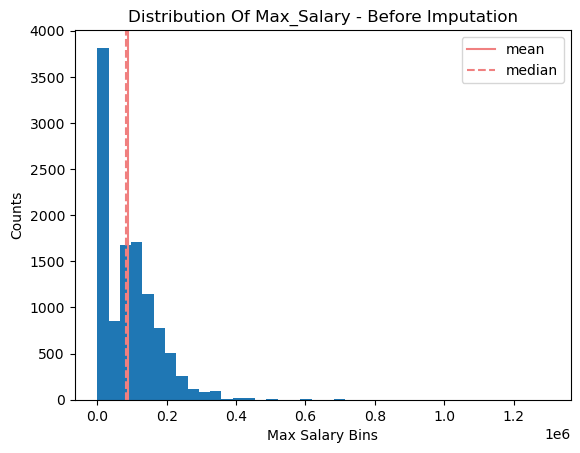

In [81]:
plt.figure()

plt.hist(df['max_salary'], bins=40)
plt.axvline(df['max_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['max_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of max_salary - before imputation".title())
plt.xlabel("Max Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `max_salary` data is right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [82]:
df['max_salary'] = df['max_salary'].fillna(df['max_salary'].median())
df['max_salary'].isna().sum()

0

In [83]:
# Sanity Check
df.isnull().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     0.000000
title                          0.000000
description                    0.000000
max_salary                     0.000000
med_salary                    93.259339
min_salary                    66.579438
pay_period                     0.000000
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
formatted_experience_level     0.000000
listed_time                    0.000000
sponsored                      0.000000
reposted                       0.000000
skills_present                 0.000000
application_method             0.000000
dtype: float64

Null values from `max_salary` column has been filled with median values. We will now take a look at `min_salary`.

In [84]:
df['min_salary'].describe()

count     11111.000000
mean      62650.128421
std       58732.644143
min           7.250000
25%          40.945000
50%       62128.000000
75%      100000.000000
max      800000.000000
Name: min_salary, dtype: float64

In [85]:
df['min_salary'].isna().sum()/df.shape[0]*100

66.57943812789509

Let's create a visualization to observe the distribution of `min_salary` column.

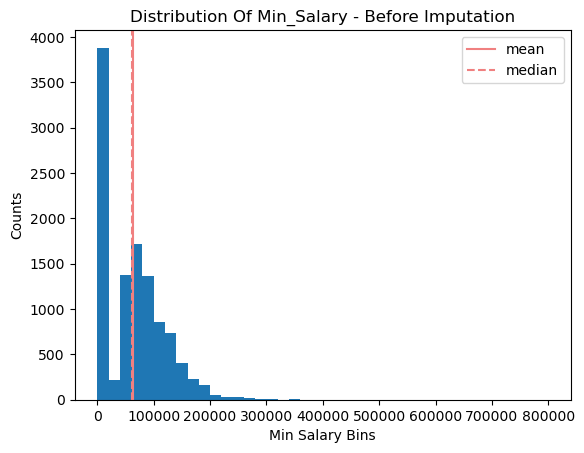

In [86]:
plt.figure()

plt.hist(df['min_salary'], bins=40)
plt.axvline(df['min_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['min_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of min_salary - before imputation".title())
plt.xlabel("Min Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `min_salary` data is right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [87]:
df['min_salary'] = df['min_salary'].fillna(df['min_salary'].median())
df['min_salary'].isna().sum()

0

In [88]:
df.isnull().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     0.000000
title                          0.000000
description                    0.000000
max_salary                     0.000000
med_salary                    93.259339
min_salary                     0.000000
pay_period                     0.000000
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
formatted_experience_level     0.000000
listed_time                    0.000000
sponsored                      0.000000
reposted                       0.000000
skills_present                 0.000000
application_method             0.000000
dtype: float64

Null values from `min_salary` has been filled with median. Finally, we will observe the `med_salary` column and fill the missing values accordingly.

In [89]:
df['med_salary'].describe()

count      2241.000000
mean      32426.170598
std       76860.422528
min           0.000000
25%          18.780000
50%          29.000000
75%       42746.000000
max      998426.000000
Name: med_salary, dtype: float64

In [90]:
df['med_salary'].isna().sum()/df.shape[0]*100

93.25933946940985

Let's create a visualization to observe the distribution of `med_salary` column.

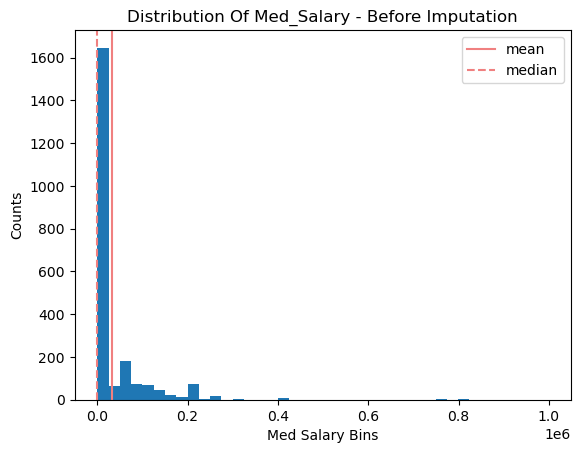

In [91]:
plt.figure()

plt.hist(df['med_salary'], bins=40)
plt.axvline(df['med_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['med_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of med_salary - before imputation".title())
plt.xlabel("Med Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

Similar to `min_salary` and `max_salary`, `med_salary` is also heavily right skewed. However, the mean and median values are significantly less than the other two salary columns (median value near 0) due to high volume of missing values from `med_salary` column. Hence, we will impute those missing values using the `min_salary` and `max_salary` values. 

In [92]:
df['med_salary'].fillna((df['min_salary'] + df['max_salary']) / 2, inplace=True)

/var/folders/5d/y_cf75vx4c9dxq1445qbw6pc0000gn/T/ipykernel_29739/868775850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['med_salary'].fillna((df['min_salary'] + df['max_salary']) / 2, inplace=True)


In [93]:
df.sample(50)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,application_type,expiry,formatted_experience_level,listed_time,sponsored,reposted,skills_present,application_method
26083,3694121441,18506580.0,"Travel Nurse RN - Labor and Delivery - $1,958 ...",Host Healthcare is seeking a travel nurse RN L...,83928.0,73028.00,62128.0,Not Specified,Part-time,"Detroit, MI",NaN,2023-08-22 20:20:00,NaN,NaN,OffsiteApply,2023-09-22 23:33:20,Entry level,2023-08-24 00:06:40,0,1,0,1
8732,3756167892,98805195.0,Freelance Writer,"Wilhelm Real Estate Agency, founded by the est...",83928.0,73028.00,62128.0,Not Specified,Part-time,"Chicago, IL",26.0,2023-11-04 02:40:00,1.0,123.0,ComplexOnsiteApply,2024-05-02 02:06:40,Not Specified,2023-11-04 02:40:00,0,0,0,0
17824,3701364132,11108120.0,Car Wash Site Manager - Shop#653 - 1833 Gunbar...,Company:Take 5 Car Wash\nJoin our impressive T...,83928.0,55000.00,62128.0,YEARLY,Full-time,"Chattanooga, TN",1.0,2023-08-22 17:33:20,NaN,3.0,OffsiteApply,2023-09-21 17:00:00,Mid-Senior level,2023-08-22 17:33:20,0,0,0,1
32877,3692365236,3671.0,Block Advisor - Remote Tax Professional,What You'll Bring To The Team...\nConduct tax ...,83928.0,73028.00,62128.0,Not Specified,Full-time,"Elmwood Park, IL",NaN,2023-08-22 00:53:20,1.0,1.0,OffsiteApply,2023-09-21 03:06:40,Mid-Senior level,2023-08-22 00:53:20,0,0,0,1
11312,3755592609,597063.0,System Engineer,GeBBS Consulting is a healthcare technology pr...,83928.0,73028.00,62128.0,Not Specified,Contract,United States,5.0,2023-11-03 18:20:00,1.0,33.0,ComplexOnsiteApply,2023-12-03 16:46:40,Not Specified,2023-11-03 18:20:00,0,0,0,0
26326,3694116621,108340.0,In-Store Shopping Clerk,Overview\nIf you enjoy providing excellent cus...,20.4,18.05,15.7,HOURLY,Part-time,"Laguna Niguel, CA",NaN,2023-08-24 00:06:40,NaN,NaN,OffsiteApply,2023-09-22 23:33:20,Entry level,2023-08-24 00:06:40,0,0,0,1
5028,3757486746,3706049.0,Registered NURSE - RN - SKILLED NURSING FACILITY,Registered NURSE - RN - SKILLED NURSING FACILI...,83928.0,73028.00,62128.0,Not Specified,Full-time,"Waterville, ME",NaN,2023-11-03 18:20:00,NaN,NaN,OffsiteApply,2023-12-03 16:46:40,Not Specified,2023-11-03 18:20:00,1,0,0,1
16933,3748842300,13203.0,Customer Service Manager - Market Operations,Are you ready to grow your career? Empire Toda...,83928.0,73028.00,62128.0,Not Specified,Full-time,"San Jose, CA",1.0,2023-10-09 18:20:00,NaN,5.0,OffsiteApply,2023-12-02 18:33:20,Mid-Senior level,2023-11-02 20:06:40,0,1,0,1
19482,3701308174,4872007.0,Events Specialist,"Our client, a leading law firm in Manhattan, i...",85000.0,75000.00,65000.0,YEARLY,Full-time,"New York, NY",82.0,2023-08-22 14:46:40,NaN,284.0,ComplexOnsiteApply,2023-09-21 14:13:20,Associate,2023-08-22 14:46:40,0,0,0,0
13026,3755571456,73201896.0,"Manager, Reporting and Technical Accounting",Manager Financial Reporting and Technical Acco...,83928.0,73028.00,62128.0,Not Specified,Full-time,"Oakbrook Terrace, IL",1.0,2023-11-03 15:33:20,NaN,4.0,ComplexOnsiteApply,2023-12-03 14:00:00,Associate,2023-11-03 15:33:20,0,0,0,0


In [94]:
df['med_salary'].describe()

count    3.324600e+04
mean     7.119402e+04
std      4.724055e+04
min      0.000000e+00
25%      7.302800e+04
50%      7.302800e+04
75%      7.302800e+04
max      1.050000e+06
Name: med_salary, dtype: float64

The updated mean and median of `med_salary` column seem more realistic than the original version. Although there are some outliers affecting the data, we will use this updated version moving forward as our main salary data. Hence, we will drop the min and max salary data to avoid redundancy in data.

In [95]:
df.drop(columns=['max_salary'], inplace=True)

In [96]:
df.drop(columns=['min_salary'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  33246 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   med_salary                  33246 non-null  float64       
 5   pay_period                  33246 non-null  object        
 6   formatted_work_type         33246 non-null  object        
 7   location                    33246 non-null  object        
 8   applies                     16238 non-null  float64       
 9   original_listed_time        33246 non-null  datetime64[ns]
 10  remote_allowed              4802 non-null   float64       
 11  views                       25886 non-null  float64   

#### Applies

In [97]:
df['applies'].isna().sum()

17008

In [98]:
df['applies'].isna().sum()/df.shape[0]

0.5115803404920892

In [99]:
df['applies'].value_counts()

applies
1.0       3706
2.0       1954
3.0       1262
4.0        970
5.0        729
6.0        587
7.0        498
8.0        413
9.0        384
10.0       340
11.0       340
12.0       294
13.0       259
14.0       215
15.0       213
16.0       189
17.0       172
18.0       153
19.0       144
20.0       127
21.0       116
22.0       108
51.0       104
24.0       102
23.0       101
26.0        88
25.0        86
28.0        84
27.0        83
31.0        80
29.0        73
30.0        67
32.0        60
34.0        58
52.0        54
35.0        54
33.0        52
36.0        48
44.0        46
38.0        44
42.0        43
41.0        43
43.0        41
46.0        41
55.0        40
40.0        39
48.0        38
53.0        37
39.0        37
45.0        36
49.0        35
37.0        34
54.0        31
47.0        28
50.0        28
65.0        26
56.0        24
67.0        23
69.0        23
71.0        22
60.0        21
82.0        20
68.0        20
66.0        19
59.0        19
61.0        19
64

In [100]:
df['applies'].describe()

count    16238.000000
mean        18.895246
std         49.059029
min          1.000000
25%          2.000000
50%          5.000000
75%         16.000000
max       1615.000000
Name: applies, dtype: float64

Let's create a visualization to observe the distribution of `applies` column.

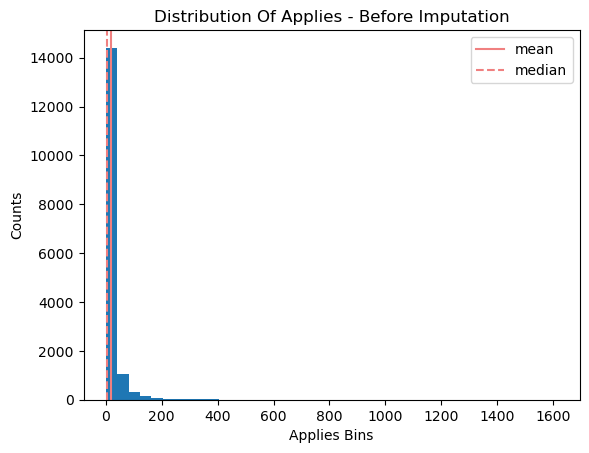

In [101]:
plt.figure()

plt.hist(df['applies'], bins=40)
plt.axvline(df['applies'].mean(), color="lightcoral", label="mean")
plt.axvline(df['applies'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of applies - before imputation".title())
plt.xlabel("Applies Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `applies` data is heavily right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [102]:
df['applies'] = df['applies'].fillna(df['applies'].median())

In [103]:
df['applies'].isna().sum()

0

#### Views

In [104]:
df['views'].isna().sum()

7360

In [105]:
df['views'].isna().sum()/df.shape[0]*100

22.138001564097937

In [106]:
df['views'].describe()

count    25886.000000
mean        58.339875
std        141.253774
min          1.000000
25%          4.000000
50%         16.000000
75%         54.000000
max       5656.000000
Name: views, dtype: float64

Let's create a visualization to observe the distribution of `views` column.

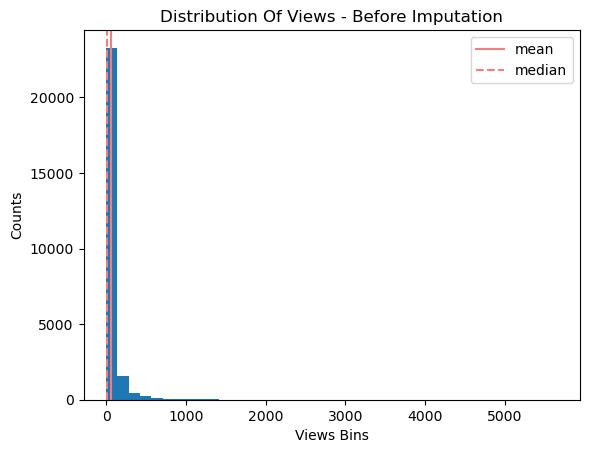

In [107]:
plt.figure()

plt.hist(df['views'], bins=40)
plt.axvline(df['views'].mean(), color="lightcoral", label="mean")
plt.axvline(df['views'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of views - before imputation".title())
plt.xlabel("Views Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `views` data is heavily right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [108]:
df['views'] = df['views'].fillna(df['views'].median())

In [109]:
df['views'].isna().sum()

0

#### Remote Allowed

In [110]:
df['remote_allowed'].describe()

count    4802.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: remote_allowed, dtype: float64

In [111]:
df['remote_allowed'].value_counts()

remote_allowed
1.0    4802
Name: count, dtype: int64

The dataset only contains the response of '1'. This could be due to the method of data collection. For instance, if the survey only had one tick-off box to check off whether the remote-working is allowed or not, then it would make sense why the data only contains '1' (check mark) as its only response. 

In [112]:
df['remote_allowed'].isna().sum()/df.shape[0]*100

85.55615713168501

To fill in the null values, we will convert this variable into a binary column (0 and 1). Here, we are making an assumption that '0' will represent the missing values (remote-working not allowed), and '1' will be remote working allowed responses. We can simply fill the missing values in with 0s to achieve this.

In [113]:
df['remote_allowed'] = df['remote_allowed'].fillna(0)
df['remote_allowed'].isna().sum()

0

In [114]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  33246 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   med_salary                  33246 non-null  float64       
 5   pay_period                  33246 non-null  object        
 6   formatted_work_type         33246 non-null  object        
 7   location                    33246 non-null  object        
 8   applies                     33246 non-null  float64       
 9   original_listed_time        33246 non-null  datetime64[ns]
 10  remote_allowed              33246 non-null  float64       
 11  views                       33246 non-null  float64   

All the missing values have been filled. We will conduct more cleaning to prepare a dataset for modeling.

### Further Data Cleaning

We have completed all the data cleaning processes by filling in the null values. Now we will plot some graphs to analyze any patterns that may occur to address our question of interest: "Is there any relationships between the `views` column with other variables within the `job_postings` dataset?"

## EDA - Visualization

We will begin by creating some visualizations to depict any potential relationships between the `views` column and other variables. Our goal is to see if there are any patterns within the visualizations to analyze the job trends regarding the `views`. We will begin by looking at various distributions of variables and their counts.

In [ ]:
#df.select_dtypes(["float", "int"]).columns

In [ ]:
#df.select_dtypes(["object"]).columns

In [ ]:
#df.select_dtypes(["datetime"]).columns

In [ ]:
# numeric_cols=['job_id', 'company_id', 'med_salary',
       #'applies', 'remote_allowed', 'views', 'sponsored', 'reposted', 
       #'skills_present', 'application_method']

In [ ]:
#categorical_cols=['pay_period', 'formatted_work_type',
       #'application_type', 'formatted_experience_level']

In [ ]:
#datetime_cols=['original_listed_time', 'expiry', 'listed_time']

In [ ]:
# Visualizations for numeric data
#for col in numeric_cols:
    #sns.histplot(data=df, x=col, kde=True, bins=10)
    #plt.title(f'Distribution of {col}')
    #plt.xlabel(col)
    #plt.ylabel('Frequency')
    #plt.show()

In [ ]:
#for col in categorical_cols:
    #plt.figure(figsize=(8, 6))
    #sns.set(style="whitegrid")
    #ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,color='coral')
    #plt.title(f'Count Plot of {col}')
    #plt.xlabel(col)
    #plt.ylabel('Count')
    
    # Adding count labels above the bars
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points', rotation=45)
    
    #plt.xticks(rotation=90)
    #plt.show()

In [ ]:
#for col in datetime_cols:
    #sns.histplot(data=df, x=col, kde=True, bins=10)
    #plt.title(f'Distribution of {col}')
    #plt.xlabel(col)
    #plt.ylabel('Frequency')
    #plt.show()

In [ ]:
#for col in numeric_cols:
    #plt.figure(figsize=(8, 6))
    #plt.scatter(df[col], df['views'], alpha=0.5)
    #plt.title(f'Scatter plot of {col} vs. Number of Views')
    #plt.xlabel(col)
    #plt.ylabel('Views')
    #plt.grid(True)
    #plt.show()

In [ ]:
#df.head()

In [ ]:
#for col in categorical_cols:
    # Create the bar plot
    #plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    #sns.barplot(x=col, y='views', data=df, ci=None)  # Set ci=None to remove error bars
    #plt.title(f'Average Views by {col}')
    #plt.xlabel(col)
    #plt.ylabel('Average Views')
    #plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    #plt.show()

In [ ]:
# Check data types of DataFrame columns
#data_types = df.dtypes

# Filter columns with object data type
#string_columns = data_types[data_types == 'object'].index.tolist()

# Check for string values in each column
#for column in string_columns:
    #unique_values = df[column].unique()
    #if len(unique_values) <= 10:  # Display unique values if they are not too many
        #print(f"Unique values in column '{column}': {unique_values}")
    #else:
        #print(f"Column '{column}' contains many unique values.")


In [ ]:
df.head()

In [ ]:
#numeric_df = df.select_dtypes(include=['float64', 'int64', 'datetime64'])
#corr_num_matrix = numeric_df.corr()

In [ ]:
# Convert categorical columns to one-hot encoded representation
#encoded_df = pd.get_dummies(categorical_cols)

# Calculate the correlation matrix
#corr_cat_matrix = encoded_df.corr()

In [ ]:
#correlation_matrix = (corr_num_matrix + corr_cat_matrix)

In [ ]:
#df_correlation = df.copy()


In [ ]:
#df_correlation = df_correlation.drop(['title', 'description'], axis=1)

In [ ]:
#corr_num_matrix

In [ ]:
#corr_cat_matrix

In [ ]:
# Add a mask
#mask = np.triu(correlation_matrix)

#pd.DataFrame(correlation_matrix)

# Create the heatmap
#plt.figure(figsize=(20, 20)) 
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
#plt.title('Correlation Heatmap of Variables')
#plt.show()

## Summary

In this notebook, we performed an analysis of a job posting dataset from LinkedIn, focusing on the `views` variable. The preliminary analysis included data loading, data cleaning, and basic & advanced EDA with visualization. Through experimentation, we were able to see the impacts of various job posting features, such as the experience level, number of applications submitted, median salary and more. The basic EDA analysis culminated in visualizations and insights aimed at understanding the job market trends, with an emphasis on number of views.